In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import colors
import copy
from time import sleep
import matplotlib.animation as animation

In [3]:
def inter(x, a):
    if x//a not in [0, 1]:
        return "error"
    else:
        if x//a == 0:
            return 1
        return -1

In [4]:
def neighbor(node, shape):
    x, y = node[0], node[1]
    max_index = shape - 1

    pos_x = x % max_index
    pos_y = y % max_index

    # node is not on the edge of the grid
    if pos_x != 0 and pos_y != 0:
        return ([(x - 1, y), (x - 1, y + 1), (x, y + 1), (x + 1, y + 1), (x + 1, y), (x + 1, y - 1), (x, y - 1),
                 (x - 1, y - 1)])

    # node is on one of the corner
    elif pos_x == 0 and pos_y == 0:
        return ([(x + inter(x, max_index), y), (x + inter(x, max_index), y + inter(y, max_index)),
                 (x, y + inter(y, max_index))])

    # other cases
    else:
        if pos_x == 0:
            return ([(x, y + 1), (x + inter(x, max_index), y + 1), (x + inter(x, max_index), y),
                     (x + inter(x, max_index), y - 1), (x, y - 1)])
        else:
            return ([(x + 1, y), (x + 1, y + inter(y, max_index)), (x, y + inter(y, max_index)),
                     (x - 1, y + inter(y, max_index)), (x - 1, y)])

        
def satisfied(grid, node):
    size = len(grid)
    kinds = grid[node[0]][node[1]][1:]
    nb_alike = 0  # type: int
    surroundings = 0
    neighbors = neighbor(node, size)
    for n in neighbors:
        if np.sum(grid[n[0]][n[1]]) > 0:
            surroundings += len(kinds)
            for i in range(1,len(kinds)):
                if grid[n[0]][n[1]][i] == kinds[i]:
                    nb_alike += 1        
    if surroundings>0:
        return nb_alike/surroundings
    else: 
        return 1
    
def unsatisfied_agents(grid):
    res = []
    size = len(grid)
    for i in range(size):
        for j in range(size):
            if np.sum(grid[i][j])>0 and satisfied(grid, (i, j)) < grid[i][j][0]:
                res.append(((i, j), grid[i][j]))
    return res

def empty_cases(grid):
    size = len(grid)
    res = []
    for i in range(size):
        for j in range(size):
            if np.sum(grid[i][j]) == 0:
                res.append(((i, j), [0]*len(grid[i][j])))
    return res

In [19]:
# Parameters of the simple Schelling model
# t : percentage of same neighbors to get satisfied
# p_blue : percentage of blue people
# p_empty : percentage of empty cases
# N :size of the grid
# n_iterations_max : just for the computing on PyCharm so that the animation eventually end up
# n_features : number of features

# We consider that each individual has diffirent features that can take two differents values.
# we also add the possibility that each individual has a distinct tolerance threshold
# Individuals are represented by list : the first value is the tolerance treshold the following values represent the feature


def several_features_schelling(t, p_empty, N, n_iterations_max, n_features, p_feature=[.5,0.5]):
    # initialization of the grid
    # the  individuals are placed into random locations
    nb_empty =int(p_empty * N * N)
    placement= [[0]*(n_features+1)] * nb_empty 
    for i in range(nb_empty,N**2):
        placement.append([t]+(1+np.random.binomial(1,p_feature,n_features)).tolist())        
    placement = np.random.permutation(placement).reshape(N, N,n_features+1)
    # next step : moving the unsatisfied agents
    # until they get satisfied    
    # or until the number of iterations has reached its limit
    # we get the coordinates of each unsatisfied agent and of each blank case
    # they all move in one round : each unsatisfied agent's location
    # is temporarily considered as an empty space and they permute
    unsatisfied = unsatisfied_agents(placement)
    nb_iterations = 0
    placements=[placement]
    
    while unsatisfied != [] and nb_iterations < n_iterations_max:
        empty = empty_cases(placement)
        for i in unsatisfied:
            n=random.randint(0,len(empty)-1)
            k,l=empty[n][0]
            p,q=i[0]
            placement[k][l]=i[1]
            placement[p][q]=[0]*(n_features+1)
            empty[n]=((p,q),[0]*(n_features+1))
            
        #placements.append(copy.deepcopy(placement))
        unsatisfied = unsatisfied_agents(placement)
        nb_iterations += 1
    print("nb_itreations : {}".format(n_iterations_max))    
    return(placement)
    

In [21]:
placements=several_features_schelling(0.5,0.02,100,1000,4,[0.5,0.5,0.5,0.5])

nb_itreations : 1000


<IPython.core.display.Javascript object>


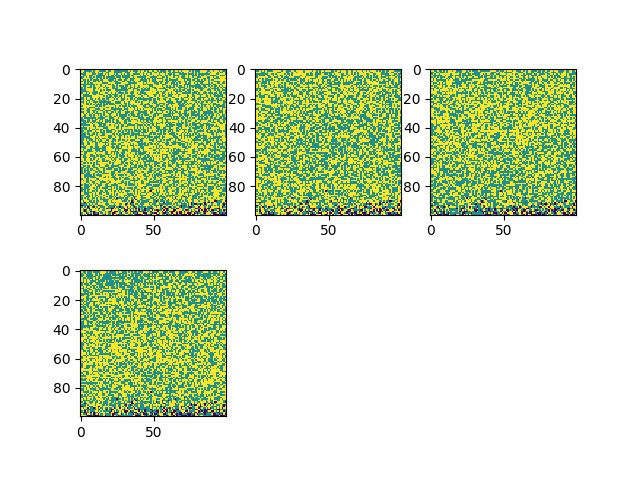

In [11]:

fig = plt.figure()
subplt=[]
n_features=len(placements[0][0][0])-1
for i in range(n_features):
    subplt.append(fig.add_subplot((n_features)//3+((n_features)%3!=0),3,i+1))
plt.ion()
fig.canvas.draw()
for i in range(len(placements)):
    for j in range (n_features):
        subplt[j].clear()
        img = placements[i][:,:,j+1]
        subplt[j].imshow(img)
        fig.canvas.draw()

In [8]:
placements[0]

array([[[0.5, 2. , 1. , 2. , 2. ],
        [0.5, 2. , 1. , 2. , 1. ],
        [0.5, 1. , 2. , 2. , 1. ],
        ...,
        [0.5, 2. , 1. , 2. , 2. ],
        [0.5, 1. , 1. , 2. , 1. ],
        [0.5, 1. , 1. , 2. , 2. ]],

       [[0.5, 2. , 2. , 2. , 1. ],
        [0.5, 2. , 1. , 2. , 2. ],
        [0.5, 2. , 1. , 2. , 1. ],
        ...,
        [0.5, 1. , 1. , 1. , 2. ],
        [0.5, 1. , 1. , 1. , 1. ],
        [0.5, 1. , 1. , 2. , 2. ]],

       [[0.5, 1. , 2. , 1. , 1. ],
        [0.5, 2. , 2. , 1. , 1. ],
        [0.5, 1. , 2. , 1. , 2. ],
        ...,
        [0.5, 1. , 1. , 1. , 1. ],
        [0.5, 2. , 2. , 1. , 2. ],
        [0.5, 1. , 1. , 1. , 1. ]],

       ...,

       [[0. , 0. , 0. , 0. , 0. ],
        [0.5, 2. , 1. , 1. , 1. ],
        [0.5, 1. , 2. , 1. , 1. ],
        ...,
        [0.5, 2. , 2. , 2. , 1. ],
        [0.5, 1. , 2. , 2. , 2. ],
        [0.5, 2. , 2. , 1. , 1. ]],

       [[0.5, 1. , 2. , 2. , 2. ],
        [0.5, 1. , 2. , 1. , 2. ],
        [0.5, 2. 

In [9]:
np.mean(placements)

1.27208

In [10]:
np.asarray(a)

NameError: name 'a' is not defined